The codes are modified from the following source:\
1. https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/3%20-%20Faster%20Sentiment%20Analysis.ipynb \
2.https://github.com/pyg-team/pytorch_geometric/blob/master/examples/node2vec.py \
3.https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI


##Word Embedding Example
We will use word embedding to predict the sentiment of each sentence in IMDB data. Our plan is to use Keras to pre-process the data, and use Pytorch to build classification model and train the data. 

## Preparing Data
Keras provides us an easier and transparant way to process the data. 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
imdb = keras.datasets.imdb
num_words = 20000           # Only the 20000 most frequent words are kept.

# Load data from keras
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1, num_words=num_words)

# The first review of the data
print(train_data[0])
print(len(train_data[0]))
print('label:', train_labels[0])

17473536/17464789 [==============================] - 0s 0us/step
[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 

For processing raw text from the scratch, there are many tutorials online that you can follow. For example, [here](https://medium.com/geekculture/nlp-with-tensorflow-keras-explanation-and-tutorial-cae3554b1290) or [here](https://realpython.com/python-keras-text-classification/).

We see that the text of the review has been encoded as a sequence of integers. Each word in the text is represented as an integer. A dictionary called the vocabulary links each word to a unique integer. In the example above, we see that the integer 13 is repeated many times. This integer corresponds to a very frequent word 'i'. And actually, the more frequent a word, the lower the integer. 


To get a fixed length input, we can simply truncate the reviews to a fixed number of words, say 256. For reviews that have more than 256 words, we will keep only the first 256 words. For shorter reviews, we will fill the unused word slots with zeros. With keras, this is easy to do:

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
print(train_data[0])
print('--------------')
print(train_data[1])

[  859    51    16     5    15    75   377    24     8    81     4   172
  2497   174    40  1489    49    84    11     4  2030  3039   121    36
    92  4881    14    20     2     9    40     6     2   621    18   148
    37   191  1941    42   511    14    20     9    17    76   253    17
   269     8  3336     4     2     8  1278     6   543  2647    10    10
   308  3102     2    47    43   188    46     7  1172     5   240  2854
   145     8     4   154  3243    11  4819    58    18    35    32     8
   327   823     7  7350     7   265   308  1828   145  1646     4   154
   890     5     9 14412    34   362  2515   154  1914     5    27 15227
     2    17    36   837     5  1941    32   367     4    96    10    10
    13    62   386    14    48    13    16  3178    42    48    11   882
   294    16  3412     2  4360     2    34     6  1042    18     2   345
    96    14     9     6   862   526  3757   917     5    60  1055    13
   115   197   474  1829    15  2006     7  6791   

In [ ]:
dict(sorted(imdb.get_word_index().items(), key=lambda x:x[1]))

1654784/1641221 [==============================] - 0s 0us/step


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [ ]:
# A dictionary mapping words to an integer index
vocabulary = imdb.get_word_index()             

# The first indices are reserved
vocabulary = {k:(v+3) for k,v in vocabulary.items()} 

# See how integer 1 appears first in the review above. 
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # unknown
vocabulary["<UNUSED>"] = 3

vocabulary["<PAD>"] = 0

# Keep the most num_words (i.e.,20000) frequent words in the vocabulary
vocabulary = {k:v for k,v in vocabulary.items() if v<num_words} 

# reversing the vocabulary. 
# in the index, the key is an integer, 
# and the value is the corresponding word.
index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    '''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and 
    replaced by the corresponding word.
    '''
    return ' '.join([index.get(i, '?') for i in text])


In [ ]:
print(train_data[0])

print(decode_review(train_data[0]))


[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 369, 459, 44, 68, 4731, 5, 181, 8, 607, 4, 6791, 3

##GloVe
Rather than training our own word vectors from scratch, we will leverage on GloVe. Its authors have released four text files with word vectors trained on different massive web datasets. They are available for download [here](https://nlp.stanford.edu/projects/glove/) **(Please make sure you download this file before you start this step)** . We will use the smallest file (“ glove.6B.zip”), which was trained on a corpus of 6 billion tokens and contains a vocabulary of 400 thousand tokens. It provides text-encoded vectors of various sizes: 50-dimensional, 100-dimensional, 200-dimensional, 300-dimensional. We'll use the 100D ones: 'glove.6B.100d.txt'.  

Let's make a dict mapping words (strings) to their NumPy vector representation:

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
import os
# os.chdir("drive/My Drive/<your-folder>")
path_to_glove_file = "/content/drive/MyDrive/BIA_667_Intro_DL/glove.6B.100d.txt"


embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


Now, let's prepare a corresponding embedding matrix that we can use in a Embedding layer. It's a simple NumPy matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary.

In [ ]:
num_tokens = len(vocabulary) 
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in vocabulary.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 19128 words (872 misses)


In [ ]:
embedding_matrix.shape

from numpy import savetxt
savetxt('drive/My Drive/embedding_matrix.csv', embedding_matrix, delimiter=',')

from numpy import loadtxt
# load array
embedding_matrix = loadtxt('drive/My Drive/embedding_matrix.csv', delimiter=',')
# print the array
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.44556999 -0.68336999  0.099493   ...  0.79701    -0.15118
   0.81467003]
 [-0.23638999  0.30585     0.32903999 ... -0.8459     -0.74324
   0.99575001]
 [ 0.34577999  0.62158    -0.17688    ... -0.96174002 -0.30772999
   0.79917997]]


In [ ]:
a = embeddings_index.get('good')
len(a)

100

## Build the Model
The next stage is building the model that we'll eventually train and evaluate. We will build a simple model of 2 layers: the `embedding` layer and the linear layer. It first calculates the word embedding for each word using the Embedding layer, then calculates the average of all of the word embeddings and feeds this through the Linear layer, and that's it! In this step, we will use Pytorch. 

We now create a neural network with an embedding layer as first layer (we load into it the weights matrix). 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.shape
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.weight.data.copy_(torch.FloatTensor(weights_matrix))

    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer

class EmbNN(nn.Module):
    def __init__(self, weights_matrix, embedding_dim, output_dim):
        
        super().__init__()
        
        self.embedding = create_emb_layer(weights_matrix, True)
        
        self.fc = nn.Linear(embedding_dim, output_dim)
        
    def forward(self, text):
        
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1) 
        
        #pooled = [batch size, embedding_dim]
                
        return self.fc(pooled)

In [ ]:
# create a model
OUTPUT_DIM = 1
EMBEDDING_DIM =100
model = EmbNN(embedding_matrix,EMBEDDING_DIM,OUTPUT_DIM)

##Train the Model

In [ ]:
import torch.optim as optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
optimizer = optim.Adam(model.parameters())

criterion = nn.BCEWithLogitsLoss()   #cross entropy loss that comes inside a sigmoid function, torch.round(torch.sigmoid(pred)), a raw output

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
# Define a function to calculate the accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

# Define a function to train the model 
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for x_batch, y_batch in iterator:
        x_batch= x_batch.to(device)
        y_batch=y_batch.to(device)

        optimizer.zero_grad()
        
        predictions = model(x_batch).squeeze(1)
        
        loss = criterion(predictions, y_batch)
        
        acc = binary_accuracy(predictions, y_batch)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Define a function to test the model's performance
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for x_batch, y_batch in iterator:
            x_batch= x_batch.to(device)
            y_batch=y_batch.to(device)
            predictions = model(x_batch).squeeze(1)
            
            loss = criterion(predictions, y_batch)
            
            acc = binary_accuracy(predictions, y_batch)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


## Implement The Model


Before we proceed to feed the data to the model, we need to transform the train/test data into Pytorch Dataset object. And we also need to create a validation set since the IMDb dataset only has train/test splits. 

In [ ]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split


train_dataset = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels).float())
test_dataset = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels).float())

train_split_dataset, valid_split_dataset = random_split(train_dataset, [20000, 5000])

In [ ]:
len(train_data)

25000

Then we need create the iterators. We iterate over these in the training/evaluation loop, and they return a batch of examples (indexed and converted into tensors) at each iteration.

In [ ]:
# Generate iterators
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_split_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(dataset=valid_split_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)
# train_loader.to(device)

In [ ]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):


    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, test_loader, criterion)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')

    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

	Train Loss: 0.666 | Train Acc: 66.25%
	 Val. Loss: 0.659 |  Val. Acc: 67.27%
	Train Loss: 0.651 | Train Acc: 67.68%
	 Val. Loss: 0.649 |  Val. Acc: 66.01%
	Train Loss: 0.639 | Train Acc: 68.60%
	 Val. Loss: 0.637 |  Val. Acc: 67.95%
	Train Loss: 0.629 | Train Acc: 69.24%
	 Val. Loss: 0.628 |  Val. Acc: 69.38%
	Train Loss: 0.620 | Train Acc: 69.67%
	 Val. Loss: 0.620 |  Val. Acc: 69.96%


In [ ]:
model.load_state_dict(torch.load('tut3-model.pt'))

test_loss, test_acc = evaluate(model, test_loader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.620 | Test Acc: 69.96%


## Pre-processing using Pytorch
In the previous example, we use keras to process data and get embedding matrix. This step can also be done by Pytorch using `Filed`. The concept of `Field` is new to us, but you can experiment with the following codes to understand how to use Pytorch to do the embedding.

## Preparing Data
We use  Pytorch Text to process the data, including ***tokenization, lowercasting, padding, numericalizaion and building vocabulary***.

One of the main concepts of TorchText is the `Field`. These define how your data should be processed. The parameters of a `Field` specify how the data should be processed. In `Field`, we can use `tokenize` to define the function used to tokenize strings, `tokenizer_language` to specify which spaCy model to use,`fix_length` to unify the length of all examples, `lower` to set whether to lowercase the text, `stop_words` to specify tokens to discard. The complete arguments and descriptions can be found [here](https://pytorch.org/text/_modules/torchtext/data/field.html).

We need define two pipelines to process the data: use the `TEXT` field to define how the review should be processed, and the `LABEL` field to process the sentiment label. 

In [ ]:
## Load data from keras
import keras
from keras.datasets import 

SyntaxError: ignored

In [ ]:
import torch
from torchtext.legacy import data       # 'data' package is to define a pipeline for preprocessing data
from torchtext.legacy import datasets
from spacy.lang.en.stop_words import STOP_WORDS


SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True      #make your experiment reproducible

seq_len = 100
stop_words = STOP_WORDS
#set up fields
TEXT = data.Field(tokenize = 'spacy',                       #Defines a datatype together with instructions for converting to Tensor
                  tokenizer_language = 'en_core_web_sm',
                  lower = True,
                  #fix_length  = seq_len,
                  #stop_words = stop_words
                  )

LABEL = data.Field(dtype = torch.float)           #Define the data type of the label data as numerical float

Another handy feature of TorchText is that it has support for common datasets used in natural language processing (NLP). 

The following code automatically downloads the IMDb dataset and splits it into the canonical train/test splits as `torchtext.datasets` objects. It process the data using the `Fields` we have previously defined. The IMDb dataset consists of 50,000 movie reviews, each marked as being a positive or negative review.
As before, we load the IMDb dataset and create the splits.

In [ ]:
import random

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:02<00:00, 40.0MB/s]


We can see how many examples are in each split by checking their length.

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 25000
Number of testing examples: 25000


We can also check an example.

In [ ]:
print(vars(train_data.examples[0]))

{'text': ['i', ',', 'too', ',', 'loved', 'this', 'series', 'when', 'i', 'was', 'a', 'kid', '.', 'in', '1952', 'i', 'was', '5', 'and', 'my', 'family', 'always', 'watched', 'this', 'show', '.', 'my', 'favorite', 'character', 'was', 'the', 'one', 'played', 'by', 'marion', 'lorne', 'as', 'a', 'rather', 'stuttering', ',', 'bumbling', 'and', 'very', 'lovable', '"', 'aunt', '"', 'type', 'person', '.', 'i', 'can', 'still', 'recall', 'her', '"', 'ubba', 'bubba', 'um', 'um', '"', 'type', 'comments', 'as', 'she', 'would', 'try', 'and', 'say', 'something', 'important', '.', 'and', 'then', 'when', 'she', 'came', 'back', 'and', 'played', 'aunt', 'clara', 'in', 'bewitched', 'it', 'was', 'great', 'casting', '!', '<', 'br', '/><br', '/>it', 'was', 'the', 'first', 'time', 'that', 'i', 'can', 'remember', 'seeing', 'walter', 'matthau', 'whose', 'career', 'i', 'followed', 'as', 'a', 'fan', 'for', 'many', 'many', 'years.<br', '/><br', '/>i', 'have', 'a', 'question', 'if', 'anyone', 'can', 'verify', ':', 'wa

The IMDb dataset only has train/test splits, so we need to create a validation set. We can do this with the .split() method.

By default this splits 70/30, however by passing a split_ratio argument, we can change the ratio of the split, i.e. a split_ratio of 0.8 would mean 80% of the examples make up the training set and 20% make up the validation set.

We also pass our random seed to the random_state argument, ensuring that we get the same train/validation split each time.

In [ ]:
import random

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

AttributeError: ignored

In [ ]:
train_data

Again, we'll view how many examples are in each split.

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 12250
Number of validation examples: 5250
Number of testing examples: 25000


Next, we have to build a vocabulary and load pre-trained word embeddings. We will use an one-hot vectors to represent each word. The following builds the vocabulary, only keeping the most common `max_size` tokens. For those words that are not in the vocabulary, the word will be replaced with a special _unknown_ or `<unk>` token. 

In [ ]:
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE, vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)
LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399999/400000 [00:22<00:00, 17797.12it/s]


Why do we only build the vocabulary on the training set? When testing any machine learning system you do not want to look at the test set in any way. We do not include the validation set as we want it to reflect the test set as much as possible.

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 25002
Unique tokens in LABEL vocabulary: 2


Why is the vocab size 25002 and not 25000? One of the addition tokens is the `<unk>` token and the other is a `<pad>` token.

We can also see the vocabulary directly using either the `stoi` (**s**tring **to** **i**nt) or `itos` (**i**nt **to**  **s**tring) method.

In [ ]:
print(TEXT.vocab.itos[:10])
print(LABEL.vocab.stoi)

['<unk>', '<pad>', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is']
defaultdict(None, {'neg': 0, 'pos': 1})


The final step of preparing the data is creating the iterators. We iterate over these in the training/evaluation loop, and they return a batch of examples (indexed and converted into tensors) at each iteration.

We'll use a BucketIterator which is a special type of iterator that will return a batch of examples where each example is of a similar length, minimizing the amount of padding per example.


In [ ]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device)

## Build the Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class FastText(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        
        self.fc = nn.Linear(embedding_dim, output_dim)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
                
        #embedded = [sent len, batch size, emb dim]
        
        embedded = embedded.permute(1, 0, 2)
        
        #embedded = [batch size, sent len, emb dim]
        
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1) 
        
        #pooled = [batch size, embedding_dim]
                
        return self.fc(pooled)

As previously, we'll create an instance of our FastText class.

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 200
OUTPUT_DIM = 1
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = FastText(INPUT_DIM, EMBEDDING_DIM, OUTPUT_DIM, PAD_IDX)

And copy the pre-trained vectors to our embedding layer. We already specifiy in TEXT `TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE, vectors = "glove.6B.100d", unk_init = torch.Tensor.normal_)`.


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.4010,  0.5359,  1.3108,  ...,  0.0346,  0.8126,  1.0903],
        [-0.7704, -0.6175,  1.1490,  ..., -0.5050, -1.1676, -0.1326],
        [-0.3083,  0.8454, -0.2364,  ...,  0.0727, -0.5078, -0.2172]])

Don't forget to set the initial weights of our unknown and padding tokens to 0.

In [ ]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

##Train the Model

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

We implement the function to calculate accuracy...

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

We define a function for training our model...

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

We define a function for testing our model...

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

Finally, train the model

In [ ]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):


    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)


    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut3-model.pt')

    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

	Train Loss: 0.679 | Train Acc: 62.89%
	 Val. Loss: 0.571 |  Val. Acc: 73.46%
	Train Loss: 0.601 | Train Acc: 77.07%
	 Val. Loss: 0.449 |  Val. Acc: 79.78%
	Train Loss: 0.501 | Train Acc: 82.70%
	 Val. Loss: 0.385 |  Val. Acc: 84.38%
	Train Loss: 0.422 | Train Acc: 86.11%
	 Val. Loss: 0.363 |  Val. Acc: 86.95%
	Train Loss: 0.363 | Train Acc: 88.25%
	 Val. Loss: 0.354 |  Val. Acc: 88.67%


In [ ]:
model.load_state_dict(torch.load('tut3-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.442 | Test Acc: 86.46%


##Node2Vec Embedding Example
We will use the well-known network of Zachary's karate club to illustrate Node2Vec method. This graph describes a social network of 34 members of a karate club and documents links between members. Here, we are interested in classifying each node based on their network connections. 

In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

     |████████████████████████████████| 8.0 MB 2.8 MB/s 
     |████████████████████████████████| 2.9 MB 2.7 MB/s 
     |████████████████████████████████| 1.4 MB 2.3 MB/s 
     |████████████████████████████████| 379 kB 5.3 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 


We'll use package `node2vec`. This package is a Python implementation of the node2vec algorithm. Given any graph, it can learn continuous feature representations for the nodes, which can then be used for various downstream machine learning tasks. You can find more details about the package [here](https://github.com/eliorc/node2vec).

In [ ]:
!pip install node2vec 

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5978 sha256=082b0371297fa926e550bb8b32cafefb6e28f099042ba8ca47a32b436453b5ad
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')

print(f'Number of graphs: {len(dataset)}')
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of edge features: {dataset.num_edge_features}')

Dataset: KarateClub():
Number of graphs: 1
Number of node features: 34
Number of classes: 4
Number of edge features: 0


After initializing the KarateClub dataset, we first can inspect some of its properties. For example, we can see that this dataset holds exactly one graph, and that each node in this dataset is assigned a **34-dimensional** feature vector (which uniquely describes the members of the karate club). Furthermore, the graph holds exactly **4** classes, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
#print(f'Number of training nodes: {data.train_mask.sum()}')
#print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Each graph in PyTorch Geometric is represented by a single Data object, which holds all the information to describe its graph representation. We can print the data object anytime via ***print(data)*** to receive a short summary about its attributes and their shapes:

```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:\
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.\
(2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector)\
(3) **node labels** as `y` (each node is assigned to exactly one class).\
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments. It is 34-dim vector of boolean values. Each element denotes whether the node is for training or not. We will customize this part in our later procedure. 

In [ ]:
#the overview of data structure 
#data.x
#data.y
data.edge_index.t()


tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

We can further visualize the graph by converting it to the networkx library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

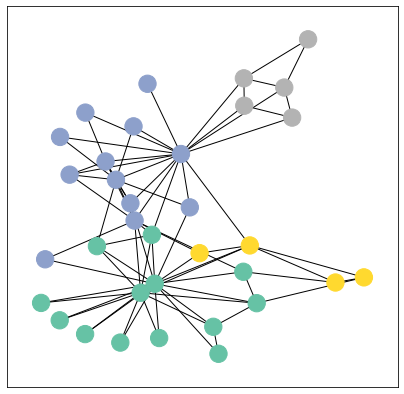

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)

def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()
    
visualize(G, color=data.y)

In [ ]:
type(G)

networkx.classes.graph.Graph

Firstly, we will learn to do the node embedding. There are different embedding generation methods like node2vec, DeepWalk etc. In this example, we will use node2vec. 

In [ ]:
from node2vec import Node2Vec
# generate walks
node2vec = Node2Vec(G, dimensions=64, walk_length=10,num_walks=80, workers=1,p=1,q=1)    # walk_length: How many nodes are in each random walk
#Embed nodes                                                                             # num_walks: Number of random walks to be generated from each node in the graph
node2vec_model = node2vec.fit(window=10, min_count=1,batch_words=4)                      # p: controls the probability to go back
                                                                                         # q: controls the probability to explore
# get embeddings
# The variable embeddings stores the embeddings in form of a dictionary where the keys are the nodes and values are the embeddings themselves.
embeddings_map = node2vec_model.wv
embeddings = embeddings_map[[str(i) for i in range(data.num_nodes)]]

embeddings.shape
#Note: any keywords acceptable by gensim.Word2vec can be passed

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 80/80 [00:01<00:00, 64.59it/s]


(34, 64)

We can set walking policy by adjusting parameters `p` and `q` in 'Node2Vec'

In [ ]:
Node2Vec(G, dimensions=64, walk_length=10,num_walks=80, workers=1,p=1,q=2)                  #smaller p: local structure
Node2Vec(G, dimensions=64, walk_length=10,num_walks=80, workers=1,p=2,q=1)                  #smaller q: global structure

## Visualize the embeddings
Embeddings are just low-dimensional numerical representations of the network, therefore we can make a visualization of these embeddings. Here, the size of the embeddings is 64, so we need to employ t-SNE which is a dimensionality reduction technique. Basically, t-SNE transforms the 64 dimension array into a 2-dimensional array so that we can visualize it in a 2D space. We can observe the 4groups of nodes are separated decently in the 2D space. The node embeddings are informative. 



([], <a list of 0 Text major ticklabel objects>)

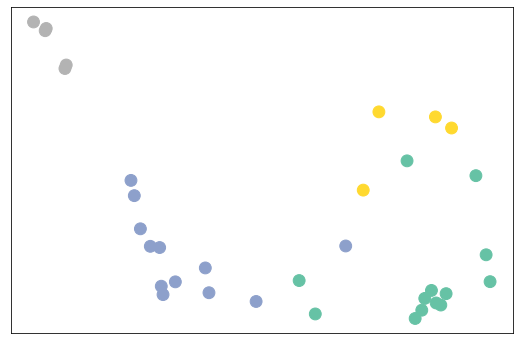

In [ ]:
#Visualize the embeddings
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# transform the embeddings from 64 dimensions to 2D space
m = TSNE(learning_rate=20, random_state=42)
tsne_features = m.fit_transform(list(embeddings))

# retrieve the labels for each node
labels = data.y

# plot the transformed embeddings
plt.figure(figsize=(9,6)) 
plt.scatter(x = tsne_features[:,0], 
            y = tsne_features[:,1],
            c = labels,
            s =140,
            cmap="Set2",
            )
plt.xticks([])
plt.yticks([])


## GCN Model
Another task is to classify the nodes according to their network connections. Our thoughts is to use their embeddings from node attributes to classify them through a GCN model. Firstly, let us get the embeddings for each node. In this example, we will use node degree as node embedding. 

In [ ]:
from sklearn.preprocessing import StandardScaler
# using degree as embedding
embeddings = np.array(list(dict(G.degree()).values()))

# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))

In [ ]:
embeddings

array([[ 2.98709092],
       [ 1.15480319],
       [ 1.41655858],
       [ 0.36953702],
       [-0.41572915],
       [-0.15397376],
       [-0.15397376],
       [-0.15397376],
       [ 0.10778163],
       [-0.67748454],
       [-0.41572915],
       [-0.93923993],
       [-0.67748454],
       [ 0.10778163],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [-0.41572915],
       [-0.67748454],
       [-0.67748454],
       [-0.67748454],
       [ 0.10778163],
       [-0.41572915],
       [-0.41572915],
       [-0.67748454],
       [-0.15397376],
       [-0.41572915],
       [-0.15397376],
       [-0.15397376],
       [ 0.36953702],
       [ 1.94006936],
       [ 3.24884631]])

In [ ]:
# Split data into train_set and test_set 
import numpy as np
from sklearn.model_selection import train_test_split

data.x = torch.from_numpy(embeddings).type(torch.float32)
X_train, X_test, y_train, y_test,indice_train, indice_test = train_test_split(data.x, data.y, np.arange(len(data.x)),test_size=0.30, random_state=42)

# create train and test masks for data
train_mask = torch.zeros(len(data.x), dtype=torch.bool)
test_mask = torch.zeros(len(data.x), dtype=torch.bool)
train_mask[indice_train] = True
test_mask[indice_test] = True
data['train_mask'] = train_mask
data['test_mask'] = test_mask

In [ ]:
data.train_mask

tensor([False,  True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True, False,  True,  True, False,  True,  True,  True, False,
         True, False,  True,  True, False,  True, False, False,  True,  True,
         True,  True, False,  True])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(1, 16)
        self.lin1 = Linear(16, 4)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = self.lin1(h)
       

        return h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1, 16)
  (lin1): Linear(in_features=16, out_features=4, bias=True)
)


## Train the model

In [ ]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.
epochs = 200

def train():
  model.train()
  optimizer.zero_grad()   # Clear gradients.
  out = model(data.x, data.edge_index)     # Perform a single forward pass.
  loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
  loss.backward()  # Derive gradients.
  optimizer.step()  # Update parameters based on gradients.
  return loss
  

@torch.no_grad()
def test():
  model.eval()
  out = model(data.x,data.edge_index)
  pred = out.argmax(dim=1)
  test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
  test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
  return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Epoch: 001, Loss: 0.6912
Epoch: 002, Loss: 0.6986
Epoch: 003, Loss: 0.6941
Epoch: 004, Loss: 0.6923
Epoch: 005, Loss: 0.6915
Epoch: 006, Loss: 0.6920
Epoch: 007, Loss: 0.6916
Epoch: 008, Loss: 0.6899
Epoch: 009, Loss: 0.6881
Epoch: 010, Loss: 0.6870
Epoch: 011, Loss: 0.6857
Epoch: 012, Loss: 0.6855
Epoch: 013, Loss: 0.6854
Epoch: 014, Loss: 0.6850
Epoch: 015, Loss: 0.6843
Epoch: 016, Loss: 0.6833
Epoch: 017, Loss: 0.6826
Epoch: 018, Loss: 0.6820
Epoch: 019, Loss: 0.6816
Epoch: 020, Loss: 0.6810
Epoch: 021, Loss: 0.6810
Epoch: 022, Loss: 0.6803
Epoch: 023, Loss: 0.6792
Epoch: 024, Loss: 0.6784
Epoch: 025, Loss: 0.6778
Epoch: 026, Loss: 0.6771
Epoch: 027, Loss: 0.6769
Epoch: 028, Loss: 0.6761
Epoch: 029, Loss: 0.6754
Epoch: 030, Loss: 0.6746
Epoch: 031, Loss: 0.6740
Epoch: 032, Loss: 0.6735
Epoch: 033, Loss: 0.6728
Epoch: 034, Loss: 0.6722
Epoch: 035, Loss: 0.6716
Epoch: 036, Loss: 0.6714
Epoch: 037, Loss: 0.6705
Epoch: 038, Loss: 0.6695
Epoch: 039, Loss: 0.6695
Epoch: 040, Loss: 0.6690
